In [1]:
import numpy as np
from numpy import linalg as lin
import random as rn
from pyvis.network import Network
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import triad_utils as tu

In [3]:
# UNIX
! rm net_names.txt
#v1) ! ls database >> net_names.txt
! ls matrices >> net_names.txt

In [4]:
file = open('net_names.txt')
net_names = [name.rstrip() for name in file]

In [5]:
net_sizes = []
for net_num in range(len(net_names)):
    matrix = np.loadtxt('matrices/'+net_names[net_num], dtype=int)
    n = len(matrix)
    net_sizes.append(n)

In [6]:
len(net_names)

71

In [7]:
census = []
for net_num in range(len(net_names)):
    matrix = np.loadtxt('matrices/'+net_names[net_num], dtype=int)
    n = len(matrix)
    for i in range(n):
        matrix[i,i] = 0 # removal of self-loops
    t = tu.triad_census(matrix)
    census.append(list(t))
    
df1 = pd.DataFrame(census)
df1.columns = ['t'+str(i) for i in range(1,14)]
df1.to_csv('triads_count.csv')

In [8]:
df1 = pd.read_csv('triads_count.csv').drop('Unnamed: 0', axis=1)

In [9]:
df1.head()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
0,33,31,87,10,18,0,8,1,0,1,2,0,1
1,47,34,53,18,20,3,51,4,1,6,12,5,0
2,123,85,180,22,26,2,38,3,3,0,7,0,0
3,9,12,25,13,6,2,1,0,2,2,1,3,1
4,36,44,68,12,8,0,2,1,0,0,0,0,0


In [10]:
norm_df1 = df1.div(df1.sum(axis=1), axis=0) 

# Network Sizes

In [11]:
size_threshold = 50




sizes = []
large_net_IDs = []
for net_num in range(len(net_names)):
    matrix = np.loadtxt('matrices/'+net_names[net_num], dtype=int)
    n = len(matrix)
    if n>= size_threshold:
        large_net_IDs.append(net_num)
    sizes.append(n)

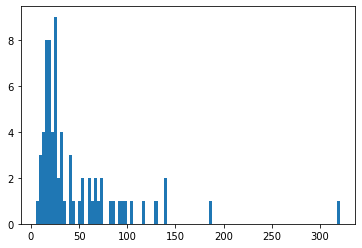

In [12]:
plt.hist(sizes,100);

In [13]:
len(large_net_IDs)

23

## Triad Concentration Profiles
As in Milo Supplementary Information pag. 2

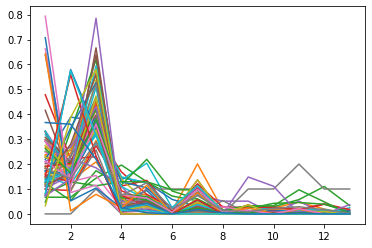

In [14]:
for i in range(len(norm_df1)):
    pr = norm_df1.loc[i]
    t = np.arange(1,14)
    plt.plot(t,pr)

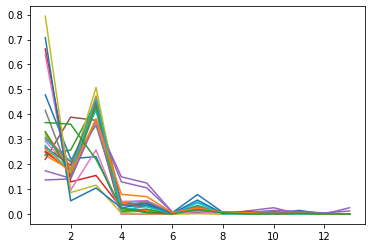

In [15]:
# only large networks
for i in large_net_IDs:
    pr = norm_df1.loc[i]
    t = np.arange(1,14)
    plt.plot(t,pr)

In [16]:
# K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
X = norm_df1

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 11)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

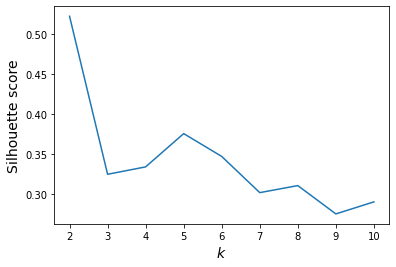

In [18]:
#plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.xticks(np.arange(2, 11, step=1))
plt.savefig('figures/silhouette.pdf')
plt.show()

In [19]:
k = 2
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(norm_df1)

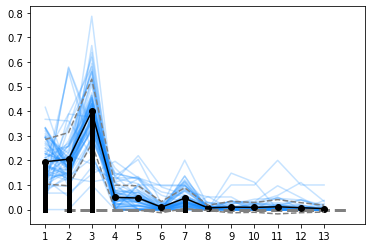

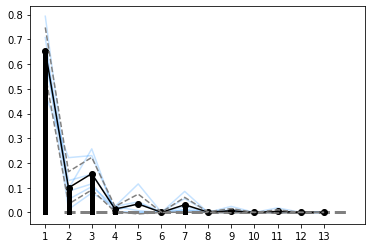

In [20]:
t = np.arange(0,13)
for y in np.unique(y_pred):
    selected_data = []
    for i in range(len(norm_df1)):
        if y_pred[i] == y:
            sp = np.array(norm_df1.iloc[i])
            selected_data.append(sp)
            plt.plot(t,sp,alpha=.25, c = 'dodgerblue')
    m = np.mean(np.array(selected_data),axis=0)
    s = np.std(np.array(selected_data),axis=0)
        
    plt.plot([0.8,13.1],[0,0],'--',c='gray',linewidth=3)
    
    plt.plot(t,m,'k')
    plt.plot(t,m,'ok')
    plt.plot(t,m+s,'--',c='gray')
    plt.plot(t,m-s,'--',c='gray')

    for k in range(13):
        if 0 <= m[k] - s[k] or 0>= m[k] + s[k]:
            plt.plot([k,k],[0,m[k]], c = 'k' ,linewidth=5)
    
    plt.xticks(np.arange(13), [str(i) for i in range(1,14)])
    
#    plt.title('macro-family #'+str(y))
    plt.savefig('figures/concentration_profile_'+str(y)+'.pdf')
    plt.show()

In [21]:
sum(y_pred)

6

In [22]:
data = [ list(norm_df1['t'+str(i+1)]) for i in range(13) ]

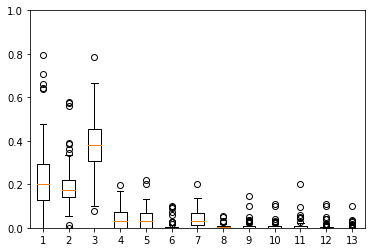

In [23]:
plt.boxplot(data,notch=False)
plt.ylim(0,1);

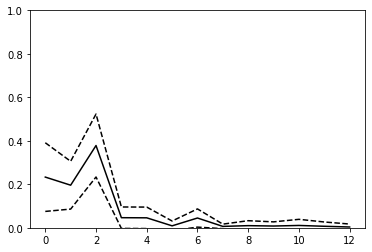

In [24]:
m = norm_df1.mean()
s = norm_df1.std()

plt.plot(t,m,'k')
plt.plot(t,m+s,'k--')
plt.plot(t,m-s,'k--')
plt.ylim(0,1);

In [25]:
df1.mean(axis=1,numeric_only=True)

0     14.769231
1     19.538462
2     37.615385
3      5.923077
4     13.153846
        ...    
66    10.923077
67    74.538462
68     2.384615
69     5.615385
70    34.384615
Length: 71, dtype: float64

# Triad Significance Profiles

In [26]:
df2 = pd.read_csv('New_run10000_FILTERED_Milo.csv').drop('Unnamed: 0', axis=1)

In [27]:
# find inf values in df2
df2.index[np.isinf(df2).any(1)]

Int64Index([19, 40], dtype='int64')

In [28]:
# WARNING!!!
# MANUALLY SETTING SOME VALUES HERE...
df2.iloc[19]['t13'] = 20
df2.iloc[40]['t13'] = 20

In [29]:
df2_norm = df2.div(
    np.linalg.norm(df2,axis=1),
    axis=0)

m = df2_norm.describe().loc['mean']
s = df2_norm.describe().loc['std']

<ipython-input-30-248d7c579965>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13'])


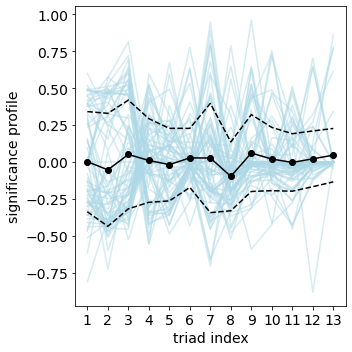

In [30]:
plt.figure(figsize=(5, 5))
ax = plt.subplot(111)

plt.plot(df2_norm.transpose(),alpha=.5,c='lightblue');
plt.plot(m,'-ko')
plt.plot(m-s,'--k')
plt.plot(m+s,'--k')
plt.xlabel("triad index", fontsize=14)
plt.ylabel("significance profile", fontsize=14)

ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13'])
plt.xticks(size=14)
plt.yticks(size=14)

plt.tight_layout()

plt.savefig('figures/all_nets_SPs.pdf')

In [31]:
# data frame with only the 23 large networks
df2large = df2.iloc[large_net_IDs]

In [32]:
# HERE I ONLY SELECT LARGE NETWORKS

df2 = df2large

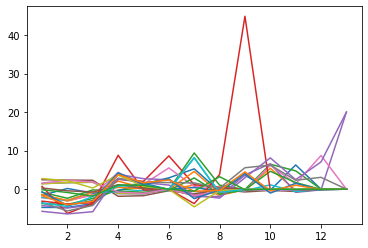

In [33]:
for i in range(len(df2)):
    pr = np.array(df2.iloc[i])
    t = np.arange(1,14)
    plt.plot(t,pr)
#    plt.ylim(-1,1)

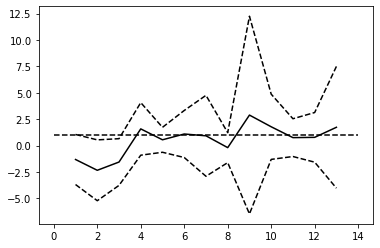

In [34]:
m = df2.mean()
s = df2.std()

plt.plot(t,m,'k')
plt.plot(t,m+s,'k--')
plt.plot(t,m-s,'k--')

plt.plot([0,14],[1,1],'--k')

# PCA of the direct census

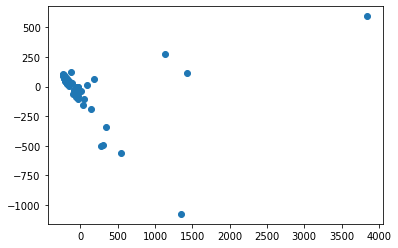

In [35]:
data0 = np.array(df1)
X_centered = df1 - df1.mean(axis = 0)
U, s , Vt = np.linalg.svd(X_centered)

W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)
PCA1 = X2D[0]
PCA2 = X2D[1]

plt.scatter(PCA1,PCA2);

# PCA of the normalized census

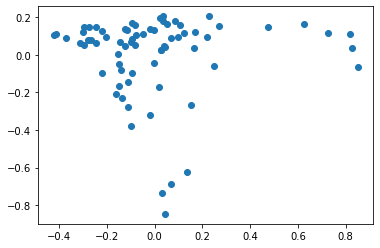

In [36]:
df1_norm = df1.div(
    np.linalg.norm(df1,axis=1),
    axis=0)

data1 = np.array(df1_norm)
X_centered = df1_norm - df1_norm.mean(axis = 0)
U, s , Vt = np.linalg.svd(X_centered)

W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)
PCA1 = X2D[0]
PCA2 = X2D[1]

plt.scatter(PCA1,PCA2);

# PCA of the Significance Profiles

In [37]:
# Normalization: Z -> SP


#ONLY LARGE:   # <<<<


df2_norm = df2.div(
    np.linalg.norm(df2,axis=1),
    axis=0)

In [38]:
df2_norm

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
2,-0.384779,-0.385628,-0.305700,0.075201,0.111146,0.238675,0.428846,-0.042357,0.295362,-0.022660,0.511222,-0.002480,0.000000
8,-0.194491,-0.432855,-0.198933,0.289500,0.052245,-0.027595,0.150413,-0.226980,-0.018183,0.756109,-0.041739,-0.004190,0.000000
11,-0.272272,-0.288992,-0.173748,-0.018234,0.026492,-0.009116,0.682206,0.075727,-0.006558,0.469904,0.345041,-0.000726,0.000000
16,-0.279716,-0.345029,-0.316035,0.229692,0.182948,0.776596,0.104935,0.046612,-0.005838,-0.009067,-0.014360,0.000000,0.000000
19,-0.183942,-0.211380,-0.177696,0.113968,0.072918,0.046385,-0.085495,-0.081261,0.159924,0.285497,-0.035616,-0.007654,0.864365
20,0.481470,0.464385,0.454862,-0.364302,-0.333952,-0.077102,-0.239022,-0.014080,-0.141976,-0.062250,-0.117501,-0.016746,0.000000
24,-0.164608,-0.215183,-0.112671,0.319126,0.094583,0.405867,0.051052,0.028112,-0.034208,0.458617,0.101744,0.642762,0.000000
25,0.421999,0.476923,0.521555,-0.338070,-0.356665,-0.035549,-0.171871,-0.199251,-0.026574,-0.073573,-0.065511,-0.004999,0.000000
29,0.377708,0.477458,0.486290,-0.281629,-0.260011,-0.015611,-0.453251,-0.197775,-0.005453,-0.020665,-0.026850,0.000000,0.000000
31,-0.231687,-0.320067,-0.075295,-0.075140,-0.032012,-0.038754,0.892523,-0.112707,-0.036525,0.122088,-0.066740,-0.006488,0.000000


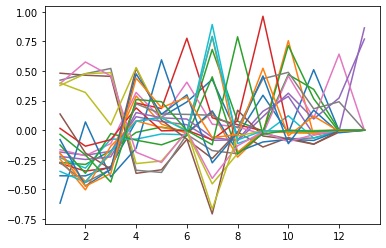

In [39]:
for i in range(len(df2_norm)):
    sp = np.array(df2_norm.iloc[i])
    t = np.arange(1,14)
    plt.plot(t,sp)
#    plt.ylim(-1,1)

In [40]:
# Cleanup


data_new1 = df2_norm.copy()                                    # Create duplicate of data
data_new1.replace([np.inf, - np.inf], np.nan, inplace = True)  # Exchange inf by NaN
data_new1

data_new2 = data_new1.dropna()                                 # Delete rows with NaN

In [41]:
len(data_new2)

23

In [42]:
# K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [43]:
X = data_new2

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 11)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

In [44]:
silhouette_scores

[0.38815330562565403,
 0.2922848817139726,
 0.29478686497731593,
 0.346162772661948,
 0.3056035041793516,
 0.35315884749150683,
 0.3566644471918138,
 0.3702188797981945,
 0.3613727275843524]

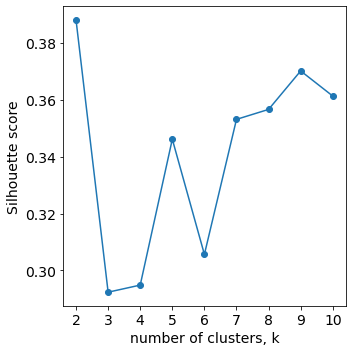

In [45]:
plt.figure(figsize=(5, 5))
plt.plot(range(2, 11), silhouette_scores,'-o')
plt.xlabel("number of clusters, k", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.xticks(np.arange(2, 11, step=1))





plt.xticks(size=14)
plt.yticks(size=14)

plt.tight_layout()



plt.savefig('figures/silhouette.pdf')
plt.show()

In [46]:
k = 2
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(data_new2)

In [47]:
print(len(y_pred))
print(sum(y_pred))

23
18


In [48]:
class_labels = []
for i in y_pred:
    if i == 1:
        class_labels.append('A')
    else:
        class_labels.append('B')

In [49]:
69*59/100

40.71

In [50]:
# Size of the networks, distinguished by cluster label
size_per_cluster = []
for i in range(len(y_pred)):
    net_num = data_new2.index[i]
    name = net_names[net_num]
    matrix = np.loadtxt('matrices/'+name, dtype=int)
    cluster = y_pred[i]
    size = len(matrix)
    size_per_cluster.append([cluster,size])

In [51]:
size0 = []
size1 = []
for i in range(len(size_per_cluster)):
    if size_per_cluster[i][0] == 0:
        size0.append(size_per_cluster[i][1])
    else:
        size1.append(size_per_cluster[i][1])

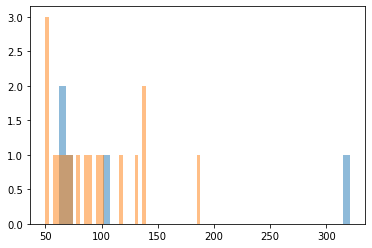

In [52]:
plt.hist(size0,40,alpha = .5);
plt.hist(size1,40,alpha = .5);

In [53]:
np.mean(size1)

91.88888888888889

In [54]:
sizes = []
large_net_IDs = []
for net_num in range(len(net_names)):
    matrix = np.loadtxt('matrices/'+net_names[net_num], dtype=int)
    n = len(matrix)
    if n>= 50:
        large_net_IDs.append(net_num)
    sizes.append(n)

In [55]:
M1 = np.array([
[-0.5, -0.5060241, -0.5,0.0060241, -0.0060241,-0.0060241,0.5,0.0060241,  0.0060241, -0.0060241,
0., -0.0060241,0.],
[-0.5, -0.5, -0.5060241,0.,0.05421687,-0.01204819,0.5,-0.0060241,-0.0060241,-0.0060241,0.,0.,-0.0060241]
])



M2 = np.array([[-0.21038251, -0.33060109,  0.06830601, -0.25956284, -0.50546448,
        0.00273224,  0.13934426,  0.00273224,  0.41256831,  0.59289617,
       -0.00819672,  0.1010929 , -0.00273224],
               [-0.33060109, -0.34153005, -0.11202186, -0.34699454, -0.40710383,
       -0.23770492,  0.25409836, -0.09016393,  0.33060109,  0.43989071,
        0.03005464,  0.19398907,  0.12295082],
               
               [ -0.4254901960784314,
 -0.45686274509803915,
 -0.24117647058823521,
 -0.2058823529411764,
 -0.3627450980392155,
 -0.06862745098039214,
 0.40980392156862755,
0.009803921568627527,
 0.2215686274509805,
 0.37450980392156874,
 0.021568627450980538,
 -0.00588235294117645,
 -0.00588235294117645],
               
               [-0.42156862745098045,
 -0.44509803921568625,
-0.2176470588235293,
 -0.2529411764705881,
 -0.39803921568627443,
 -0.08039215686274503,
 0.36666666666666675,
 -0.0960784313725489,
 0.2647058823529413,
 0.3901960784313727,
 0.013725490196078605,
 0.1000000000000002,
 -0.00588235294117645]
    
])













M3= np.array([
    [-0.0248 , -0.0248 , -0.0106 , -0.436  , -0.0745 , -0.677  ,
        0.00355,  0.0319 ,  0.457  ,  0.0603 ,  0.0532 ,  0.188  ,
        0.238  ],
    [-0.0957, -0.0816, -0.0461, -0.564 , -0.202 , -0.401 ,  0.0319,
        0.0674,  0.45  ,  0.195 ,  0.0745,  0.323 ,  0.372 ],
    
     [-0.01776649746192871,
 -0.02284263959390842,
 -0.012690355329948999,
 -0.09390862944162415,
 -0.25126903553299473,
 -0.6827411167512689,
 0.002538071065990022,
 0.05837563451776673,
 0.06852791878172615,
 0.19543147208121847,
 0.05837563451776673,
 0.05837563451776673,
 0.6522842639593911],
    
     [-0.180203045685279,
 -0.281725888324873,
 -0.10913705583756317,
 -0.26142131979695415,
 -0.3578680203045683,
 -0.5,
 0.11928934010152303,
 -0.012690355329948999,
 0.17512690355329963,
0.2664974619289343,
 0.06852791878172615,
 0.23604060913705605,
 0.5355329949238581],
    
[-0.24619289340101513,
 -0.20558375634517745,
 -0.20558375634517745,
 -0.31725888324873064,
 -0.296954314720812,
 -0.5862944162436547,
 0.18020304568527934,
 -0.012690355329948999,
0.14467005076142148,
0.10406091370558401,
 0.05329949238578702,
 0.24111675126903576,
 0.44923857868020334],
    
    [ -0.24619289340101513,
 -0.13959390862944143,
 -0.19035532994923843,
-0.3527918781725885,
 -0.31725888324873064,
 -0.4898477157360406,
 0.08375634517766517,
 0.0989847715736043,
 0.28172588832487333,
 0.19543147208121847,
 0.11928934010152303,
 0.16497461928934043,
 0.5101522842639596]

    
])

M4 = np.array(

[
[ 0.48   ,  0.5    ,  0.493  ,  0.147  ,  0.153  ,  0.0667 ,
       -0.353  , -0.24   , -0.12   , -0.127  , -0.147  , -0.0667 ,
        0.00667],
    [ 0.433,  0.413,  0.347,  0.273,  0.227,  0.193, -0.413, -0.18 ,
       -0.267, -0.167, -0.227, -0.16 , -0.08 ],
    
    
     [0.36666666666666653,
 0.32857142857142846,
 0.4666666666666665,
 0.3333333333333332,
 0.10952380952380936,
 0.14285714285714268,
 -0.2952380952380953,
 -0.2428571428571431,
 -0.41428571428571437,
 -0.04285714285714304,
 -0.19523809523809543,
 -0.1809523809523811,
 -0.12857142857142878],
    
     [0.4333333333333332,
 0.4047619047619046,
 0.34285714285714275,
 0.23809523809523797,
 0.2142857142857142,
 0.19047619047619035,
 -0.41904761904761934,
 -0.1619047619047621,
 -0.24761904761904774,
 -0.15714285714285736,
 -0.19523809523809543,
 -0.16666666666666674,
 -0.0904761904761906],
    
    [0.36666666666666653,
 0.4714285714285713,
 0.30952380952380937,
 0.24285714285714272,
0.19047619047619035,
 0.14761904761904754,
 -0.3952380952380954,
 -0.14285714285714302,
 -0.18571428571428583,
 -0.13809523809523827,
 -0.20476190476190492,
 -0.15714285714285736,
 -0.0904761904761906]
    
    
]
)







 




In [56]:
X_centered = data_new2 - data_new2.mean(axis = 0)
# X_centered = df2_norm - df2_norm.mean(axis = 0)

U, s , Vt = np.linalg.svd(X_centered)

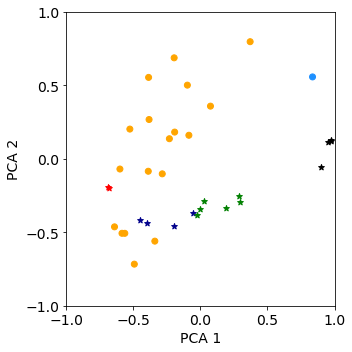

In [57]:
# PCA All data

W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)
PCA1 = X2D[0]
PCA2 = X2D[1]

plt.figure(figsize=(5, 5))

colormap = np.array(['dodgerblue', 'orange'])



plt.scatter(PCA1,PCA2, c=colormap[y_pred], label=y_pred)



# Milo family 1 (2 points, complete)

M1_centered = M1 -np.array(df2_norm.mean(axis = 0))
M1_2D = M1_centered.dot(W2)
plt.scatter(M1_2D[:,0],M1_2D[:,1], c='red',marker = '*')

# Milo family 2 (2 point)

M2_centered = M2 -np.array(df2_norm.mean(axis = 0))
M2_2D = M2_centered.dot(W2)
plt.scatter(M2_2D[:,0],M2_2D[:,1], c='darkblue',marker = '*')


# Milo family 3 (2 point)

M3_centered = M3 -np.array(df2_norm.mean(axis = 0))
M3_2D = M3_centered.dot(W2)
plt.scatter(M3_2D[:,0],M3_2D[:,1], c='green',marker = '*')

# Milo family 4 (2 point)

M4_centered = M4 -np.array(df2_norm.mean(axis = 0))
M4_2D = M4_centered.dot(W2)
plt.scatter(M4_2D[:,0],M4_2D[:,1], c='black',marker = '*')


plt.xticks(np.arange(-1, 1.5, step=.5))
plt.yticks(np.arange(-1, 1.5, step=.5))



plt.xticks(size=14)
plt.yticks(size=14)


plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('PCA 1', fontsize=14);
plt.ylabel('PCA 2', fontsize=14);

plt.tight_layout()

plt.savefig('figures/PCA_k'+str(2)+'.pdf')

<ipython-input-58-c59453b06b5a>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13'])


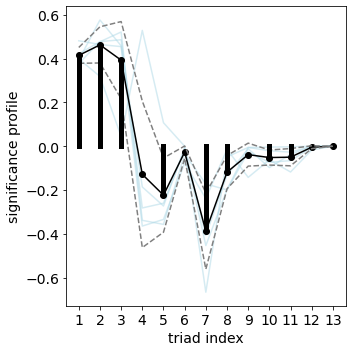

<ipython-input-58-c59453b06b5a>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13'])


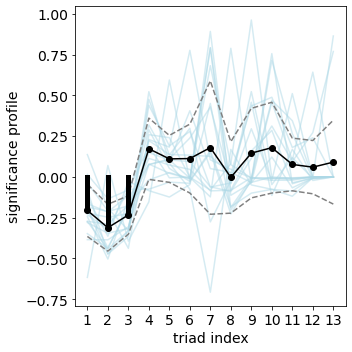

In [58]:
t = np.arange(0,13)
for y in np.unique(y_pred):
    selected_data = []

    plt.figure(figsize=(5, 5))
    
    for i in range(len(data_new2)):    
#   for i in range(len(df2_norm)):
        if y_pred[i] == y:
            sp = np.array(data_new2.iloc[i])
#           sp = np.array(df2_norm.iloc[i])
            selected_data.append(sp)
            plt.plot(t,sp,alpha=.5, c = 'lightblue')
    m = np.mean(np.array(selected_data),axis=0)
    s = np.std(np.array(selected_data),axis=0)
    
    
#    plt.plot([0.8,13.1],[0,0],'--',c='gray',linewidth=3)
    
    plt.plot(t,m,'k')
    plt.plot(t,m,'ok')
    plt.plot(t,m+s,'--',c='gray')
    plt.plot(t,m-s,'--',c='gray')

    
    plt.xlabel("triad index", fontsize=14)
    plt.ylabel("significance profile", fontsize=14)

    ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13'])
    plt.xticks(size=14)
    plt.yticks(size=14)

    plt.tight_layout()
    
    
    for k in range(13):
        if 0 <= m[k] - s[k] or 0>= m[k] + s[k]:
            
            plt.plot([k,k],[0,m[k]], c = 'k' ,linewidth=5)
    
    plt.xticks(np.arange(13), [str(i) for i in range(1,14)])
    
#    plt.title('macro-family #'+str(y))
    plt.savefig('figures/k2profile_'+str(y)+'_only_large.pdf')
    plt.show()

In [59]:
m1 = np.mean(M1,axis=0)
m2 = np.mean(M2,axis=0)
m3 = np.mean(M3,axis=0)
m4 = np.mean(M4,axis=0)

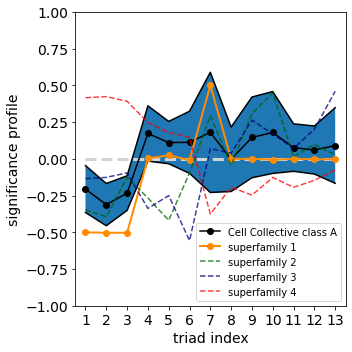

In [60]:
y = 1
selected_data = []
for i in range(len(data_new2)):
#for i in range(len(df2_norm)):
    if y_pred[i] == y:
        sp = np.array(data_new2.iloc[i])
#        sp = np.array(df2_norm.iloc[i])
        selected_data.append(sp)
#       plt.plot(t,sp,alpha=.25, c = 'dodgerblue')
m = np.mean(np.array(selected_data),axis=0)
s = np.std(np.array(selected_data),axis=0)

plt.figure(figsize=(5, 5))
plt.plot([0,12],[0,0],'--',c='lightgray',linewidth=3)
    
plt.plot(t,m,'-o',c='k', label='Cell Collective class A')
plt.plot(t,m+s,'-',c='k')
plt.plot(t,m-s,'-',c='k')

plt.fill_between(t, m-s, m+s,alpha=1)

#for k in range(13):
#    if 0 <= m[k] - s[k] or 0>= m[k] + s[k]:
#        plt.plot([k,k],[0,m[k]], c = 'k' ,linewidth=5)
    
plt.xticks(np.arange(13), [str(i) for i in range(1,14)])

#plt.plot(np.arange(13), m1,'--',c='darkorange',alpha=.75,linewidth=2.0, label='superfamily 1')
plt.plot(np.arange(13), m1,'-o',c='darkorange',alpha=1,linewidth=2.0, label='superfamily 1')

plt.plot(np.arange(13), m2,'--',c='darkgreen',alpha=.75, label='superfamily 2')
plt.plot(np.arange(13), m3,'--',c='navy',alpha=.75, label='superfamily 3')

#plt.plot(np.arange(13), m4,'-o',c='red',alpha=1, label='superfamily 4')
plt.plot(np.arange(13), m4,'--',c='red',alpha=.75, label='superfamily 4')


#plt.title('macro-family #'+str(y))
#plt.savefig('figures/family_k_4_num_'+str(y)+'.pdf')
#plt.savefig('figures/comparison.pdf')
plt.xlim(-0.5,12.5)
plt.ylim(-1,1)



plt.xlabel("triad index", fontsize=14)
plt.ylabel("significance profile", fontsize=14)

#ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13'])
plt.xticks(size=14)
plt.yticks(size=14)

plt.tight_layout()




plt.legend()
plt.savefig('figures/comparison1_only_large.pdf')
plt.show()

#print('corr. w/ 1:',np.corrcoef(m,m1)[0,1])
#print('corr. w/ 2:',np.corrcoef(m,m2)[0,1])
#print('corr. w/ 3:',np.corrcoef(m,m3)[0,1])
#print('corr. w/ 4:',np.corrcoef(m,m4)[0,1])




In [61]:
import scipy

for MSP in (m1,m2,m3,m4):
    print(scipy.stats.pearsonr(m,MSP)[0])

0.8810827133366805
0.574726962653033
0.15970500984248906
-0.7096862454896515


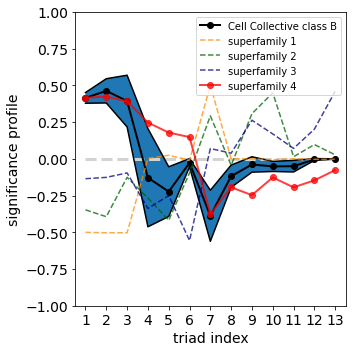

In [62]:
y = 0
selected_data = []
for i in range(len(data_new2)):
#for i in range(len(df2_norm)):
    if y_pred[i] == y:
        sp = np.array(data_new2.iloc[i])
#        sp = np.array(df2_norm.iloc[i])
        selected_data.append(sp)
#       plt.plot(t,sp,alpha=.25, c = 'dodgerblue')
m = np.mean(np.array(selected_data),axis=0)
s = np.std(np.array(selected_data),axis=0)



plt.figure(figsize=(5, 5))
plt.plot([0,12],[0,0],'--',c='lightgray',linewidth=3)
    
plt.plot(t,m,'-o',c='k',linewidth=2.0, label='Cell Collective class B')
plt.plot(t,m+s,'-',c='k')
plt.plot(t,m-s,'-',c='k')

plt.fill_between(t, m-s, m+s,alpha=1)

#for k in range(13):
#    if 0 <= m[k] - s[k] or 0>= m[k] + s[k]:
#        plt.plot([k,k],[0,m[k]], c = 'k' ,linewidth=5)
    
plt.xticks(np.arange(13), [str(i) for i in range(1,14)])

#plt.plot(np.arange(13), m1,'--',c='darkorange',alpha=1, label='superfamily 1')
plt.plot(np.arange(13), m1,'--',c='darkorange',alpha=.75, label='superfamily 1')

plt.plot(np.arange(13), m2,'--',c='darkgreen',alpha=.75, label='superfamily 2')
plt.plot(np.arange(13), m3,'--',c='navy',alpha=.75, label='superfamily 3')

#plt.plot(np.arange(13), m4,'-o',c='red',alpha=1,linewidth=2.0, label='superfamily 4')
plt.plot(np.arange(13), m4,'-o',linewidth=2.0,c='red',alpha=.75, label='superfamily 4')
    
#plt.title('macro-family #'+str(y))
#plt.savefig('figures/family_k_4_num_'+str(y)+'.pdf')
#plt.savefig('figures/comparison.pdf')
plt.xlim(-0.5,12.5)
plt.ylim(-1,1)



plt.xlabel("triad index", fontsize=14)
plt.ylabel("significance profile", fontsize=14)

#ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13'])
plt.xticks(size=14)
plt.yticks(size=14)

plt.tight_layout()





plt.legend(loc =1)
plt.savefig('figures/comparison2_only_large.pdf')
plt.show()

#print('corr. w/ 1:',np.corrcoef(m,m1)[0,1])
#print('corr. w/ 2:',np.corrcoef(m,m2)[0,1])
#print('corr. w/ 3:',np.corrcoef(m,m3)[0,1])
#print('corr. w/ 4:',np.corrcoef(m,m4)[0,1])




In [63]:
for MSP in (m1,m2,m3,m4):
    print(scipy.stats.pearsonr(m,MSP)[0])

-0.9644764242904423
-0.45031508456175806
-0.10722227590822409
0.7482005774536208


because there are not enough data points in Milo's, I'm not trying T-tests. Instead I'm just using the RMSE between the arrays of means.

In [64]:
np.sum(y_pred)

18

In [65]:
k = 2
kmeans = KMeans(n_clusters=k)
y_pred_2 = kmeans.fit_predict(data_new2)

k = 4
kmeans = KMeans(n_clusters=k)
y_pred_4 = kmeans.fit_predict(data_new2)

In [66]:
#df_labels = pd.DataFrame()
#df_labels['network'] = net_names
#df_labels['k2labels'] = y_pred_2
#df_labels['k4labels'] = y_pred_4
#df_labels.to_csv('labels.csv')  

In [67]:
#df_labels

In [68]:
data_new2

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
2,-0.384779,-0.385628,-0.305700,0.075201,0.111146,0.238675,0.428846,-0.042357,0.295362,-0.022660,0.511222,-0.002480,0.000000
8,-0.194491,-0.432855,-0.198933,0.289500,0.052245,-0.027595,0.150413,-0.226980,-0.018183,0.756109,-0.041739,-0.004190,0.000000
11,-0.272272,-0.288992,-0.173748,-0.018234,0.026492,-0.009116,0.682206,0.075727,-0.006558,0.469904,0.345041,-0.000726,0.000000
16,-0.279716,-0.345029,-0.316035,0.229692,0.182948,0.776596,0.104935,0.046612,-0.005838,-0.009067,-0.014360,0.000000,0.000000
19,-0.183942,-0.211380,-0.177696,0.113968,0.072918,0.046385,-0.085495,-0.081261,0.159924,0.285497,-0.035616,-0.007654,0.864365
20,0.481470,0.464385,0.454862,-0.364302,-0.333952,-0.077102,-0.239022,-0.014080,-0.141976,-0.062250,-0.117501,-0.016746,0.000000
24,-0.164608,-0.215183,-0.112671,0.319126,0.094583,0.405867,0.051052,0.028112,-0.034208,0.458617,0.101744,0.642762,0.000000
25,0.421999,0.476923,0.521555,-0.338070,-0.356665,-0.035549,-0.171871,-0.199251,-0.026574,-0.073573,-0.065511,-0.004999,0.000000
29,0.377708,0.477458,0.486290,-0.281629,-0.260011,-0.015611,-0.453251,-0.197775,-0.005453,-0.020665,-0.026850,0.000000,0.000000
31,-0.231687,-0.320067,-0.075295,-0.075140,-0.032012,-0.038754,0.892523,-0.112707,-0.036525,0.122088,-0.066740,-0.006488,0.000000


# Correlation only large networks

In [69]:
import seaborn as sns
from scipy.stats import norm

In [70]:
data_new2.shape

(23, 13)

In [71]:
data = data_new2.transpose
data = pd.DataFrame(np.transpose(np.array(data_new2)))
data.shape

(13, 23)

In [72]:
corrmat = data.corr()

<AxesSubplot:>

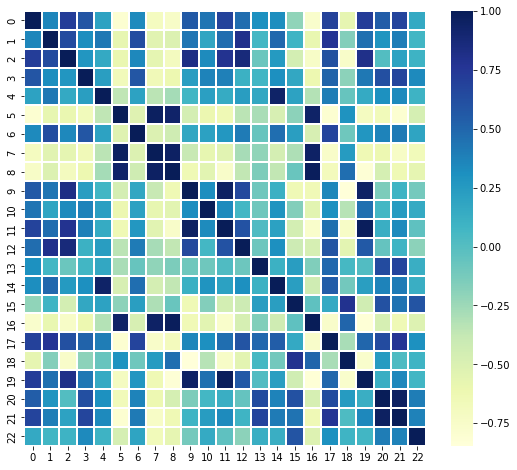

In [73]:
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [74]:
# https://wil.yegelwel.com/cluster-correlation-matrix/

import scipy
import scipy.cluster.hierarchy as sch

def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

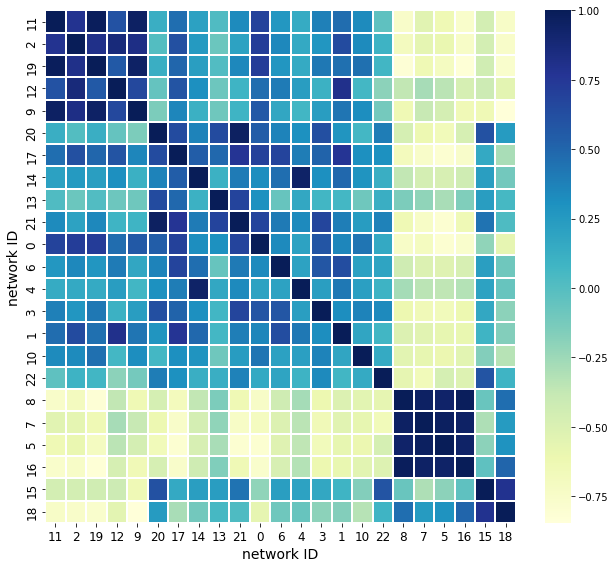

In [75]:
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(cluster_corr(corrmat), ax = ax, cmap ="YlGnBu", linewidths = 0.2)

plt.xlabel("network ID", fontsize=14)
plt.ylabel("network ID", fontsize=14)

plt.xticks(size=12)
plt.yticks(size=12)


plt.tight_layout()

plt.savefig('figures/corr_large.pdf')

# Correlation: All networks

In [76]:
df2 = pd.read_csv('New_run10000_FILTERED_Milo.csv').drop('Unnamed: 0', axis=1)

In [77]:
df2_norm = df2.div(
    np.linalg.norm(df2,axis=1),
    axis=0)

In [78]:
# Cleanup
data_new1 = df2_norm.copy()                                    # Create duplicate of data
data_new1.replace([np.inf, - np.inf], np.nan, inplace = True)  # Exchange inf by NaN
data_new1
data_new2 = data_new1.dropna() 

In [79]:
len(data_new2)

69

In [80]:
# Transpose
data = data_new2.transpose
data = pd.DataFrame(np.transpose(np.array(data_new2)))
data.shape

(13, 69)

In [81]:
corrmat = data.corr()

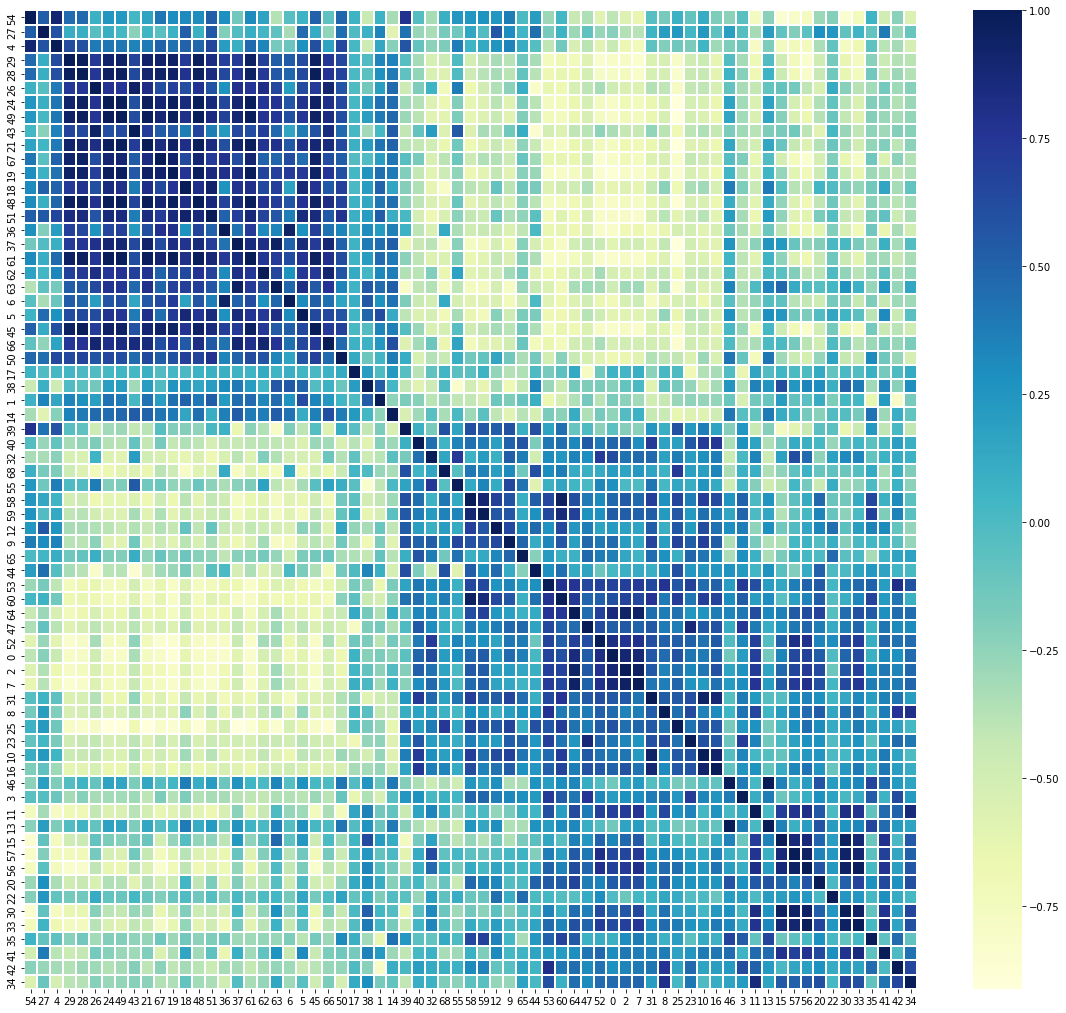

In [82]:
f, ax = plt.subplots(figsize =(20,18))
sns.heatmap(cluster_corr(corrmat), ax = ax, cmap ="YlGnBu", linewidths = 0.1)




plt.savefig('figures/corr_all.pdf')